Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за то, что прислал такую хорошую работу, видно, что приложено много усилий.
* Проект, достаточно аккуратный - приятно проверять такие работы.
- Радует, что ты не стесняешься задавать вопросы, я постарался на них ответить и оставить некоторые советы, надеюсь они будут интересными или полезными.
- Есть небольшие недочеты связанные с масштабированием признаков и вычислением и анализом времени, но я думаю ты легко с ними справишься.
- Жду твою обновленную работу.

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативные правки своей работы.
- Радует, что ты реагируешь на мои комментарии и прислушиваешься к советам.
- Я ответил на проблему связанную с catboost-ом, надеюсь теперь все будет ок.
- Ты корректно обновил и проект и теперь каждый шаг выглядит законченным.
- Я принимаю твою работу и желаю удачи в дальнейшем обучении.
- Продолжай в том же духе.

<div class="alert alert-block alert-success">
<b>Комментарий студента:</b> Добрый день, Люман! Спасибо за оперативную проверку моего проекта и советы по его улучшению.  
    Я постарался исправить все ошибки.
</div>

## <a id='table of contents'>Содержание</a>  
<a href='#part1'>1. ПОСТАНОВКА ЗАДАЧИ</a>     
<a href='#part2'>2. ЗАГРУЗКА И ОПИСАНИЕ ДАННЫХ</a>    
<a href='#part3'>3. ПРЕДОБРАБОТКА ДАННЫХ</a>    
<a href='#part4'>3.1. Заполнение пропусков </a>   
<a href='#part5'> 3.2 Исследование аномалий в данных</a>    
<a href='#part6'>3.3 Подготовка данных к обучению модели</a>     
<a href='#part7'>4 ОБУЧЕНИЕ МОДЕЛЕЙ</a>     
<a href='#part8'>4.1 Обучим модель линейной регрессии </a>     
<a href='#part9'>4.2 Обучим модель деревьев </a>     
<a href='#part10'>5 ОБЩИЙ ВЫВОД </a>   

# <a id='part1'>1. ПОСТАНОВКА ЗАДАЧИ</a>
<a href='#table of contents'>к оглавлению</a>

***Цель:*** Необходимо построить модель предсказания цены автомобиля по историческим данным  
***Целевая метрика:*** - RMSE, также необходимо учитывать скорость обучения модели и скорость предсказания

# <a id='part2'> 2. ЗАГРУЗКА И ОПИСАНИЕ ДАННЫХ</a>
<a href='#table of contents'>к оглавлению</a>

### Признаки ###
***DateCrawled*** — дата скачивания анкеты из базы  
***VehicleType*** — тип автомобильного кузова  
***RegistrationYear*** — год регистрации автомобиля  
***Gearbox*** — тип коробки передач  
***Power*** — мощность (л. с.)  
***Model*** — модель автомобиля  
***Kilometer*** — пробег (км)  
***RegistrationMonth*** — месяц регистрации автомобиля  
***FuelType*** — тип топлива  
***Brand*** — марка автомобиля  
***NotRepaired*** — была машина в ремонте или нет  
***DateCreated*** — дата создания анкеты  
***NumberOfPictures*** — количество фотографий автомобиля  
***PostalCode*** — почтовый индекс владельца анкеты (пользователя)  
***LastSeen*** — дата последней активности пользователя  
### Целевой признак###
***Price*** — цена (евро)   

<div class="alert alert-block alert-success">
<b>Успех:</b> Спасибо за подробное описание проекта.
</div>

In [1]:
!pip install wheel
!pip install lightgbm

In [2]:
conda config --add channels conda-forge

In [3]:
conda install catboost

In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from catboost import CatBoostRegressor
from sklearn.model_selection import RepeatedKFold
import time
pd.options.mode.chained_assignment = None
try:
    df=pd.read_csv('autos.csv', sep=',') 
except: 
    df=pd.read_csv('/datasets/autos.csv', sep=',')
pd.options.display.float_format = '{:.2f}'.format

In [5]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from lightgbm import LGBMRegressor

In [6]:
df.info()

In [7]:
display(df.head())

***ВЫВОД 1:*** 
    - В столбцах VehicleType,  Gearbox,  Model, FuelType, NotRepaired есть пропуски
    - Столбцы LastSeen, PostalCode, DateCreated, DateCrawled и RegistrationMonth можно удалить, так как эти данные излишни
    - Категориальные признаки необходимо преобразовать в численные

<div class="alert alert-block alert-success">
<b>Успех:</b> Загрузка данных и первичный анализ сделанны корректно.
</div>

# <a id='part3'>3. ПРЕДОБРАБОТКА ДАННЫХ </a>
<a href='#table of contents'>к оглавлению</a>

Сделаем названия столбцов строчными

In [8]:
def snake_case(s):
    """Преобразование строк из camelCase в snake_case."""
    return ''.join('_' + c.lower()
                   if all([i != 0,
                           c.isupper(),
                           s[i - 1].islower()])
                   else c.lower()
                   for i, c in enumerate(s))

In [9]:
df.columns = map(snake_case, df.columns)
print(df.columns)

Удалим "лишние" признаки 

In [10]:
df = df.drop(['last_seen', 'postal_code', 'date_created', 'date_crawled', 'registration_month'], axis=1)
#замечание насчет признака 'number_of_pictures'. Понятно, что этот признак не влияет напрямую на цену машину, но если о цене
#машину на сайте, то ясно, что шанс быстрее продать есть у того, кто выложил больше и лучше фото. Получается он влияет на цену. 
df.info()

Проверим признаки на мультиколлинеарность

In [11]:
#pd.plotting.scatter_matrix(df, figsize = (16, 16))

***Промежуточный вывод:*** Корреляции между признаками не обнаружено

<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - хорошее решение.
</div>

# <a id='part4'>3.1. Заполнение пропусков </a>
<a href='#table of contents'>к оглавлению</a>

***Создадим функцию для замены пропусков в столбце по значениям другого столбца***

In [12]:
def Nan_fill (df, NaN_column, fill_column):
    
    #создадим словарь по которому будем заполнять пропуски с самым часто встречающимся значением
    df_dict=dict(df.groupby(fill_column).agg(lambda x: x.mode(dropna=False)[0])[NaN_column])
    
    #заполним пропуски в столбце 
    df[NaN_column]=df[NaN_column].fillna(df[fill_column].map(df_dict)) 
    
    #выведем пропущенные значения
    print(df[NaN_column].isnull().sum())
    
    return df

<div class="alert alert-block alert-success">
<b>Успех:</b> Хороший помощник.
</div>

Заполним пропуски в столбце ***model*** самым частым значением по бренду

In [13]:
Nan_fill (df, 'model', 'brand')

Заполним пропуски в столбце ***VehicleType***

In [14]:
Nan_fill (df, 'vehicle_type', 'model')

Заполним пропуски в столбце ***Gearbox***

In [15]:
Nan_fill (df, 'gearbox', 'model')

Заполним пропуски в столбце ***FuelType***

In [16]:
Nan_fill (df, 'fuel_type', 'model')

Заполним пропуски в столбце ***NotRepaired***  

Логично предположить, что если пользователь не указал, что машина была в ремонте, то значит ее ни разу не ремонтировали, 
поэтому заполним пропуски ответом 'no'

In [17]:
df['not_repaired']=df['not_repaired'].fillna('no')
print(df['not_repaired'].isnull().sum())

Выведем полученный датасет 

In [18]:
df.info()

***Промежуточный вывод***  
Достаточно большое количество пропусков осталось в столбце model, но так как разумного способа
заполнить эти пропуски нет, то оставим эти пропуски.

Заполним все оставшиеся пропуcки в датасете новой категорией - 'unknown'

In [19]:
df=df.fillna('unknown')
df.info()

<div class="alert alert-block alert-success">
<b>Успех:</b> Мне понравится твой подход к заполнению пропусков, он выполнен хорошо.
</div>

# <a id='part5'>3.2 Исследование аномалий в данных </a>
<a href='#table of contents'>к оглавлению</a>

***Построим графики для столбцов с числовыми признаками***

Изучим признак 'price'

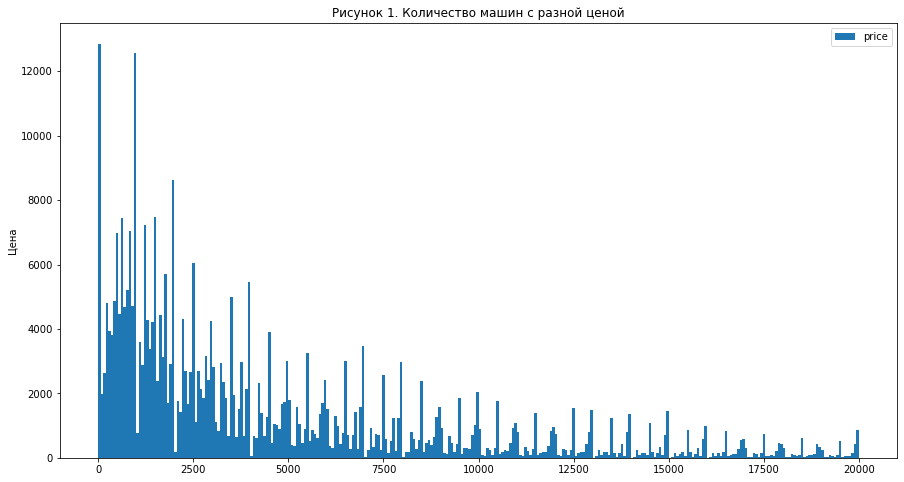

In [20]:
df.plot(y='price', title='Рисунок 1. Количество машин с разной ценой', kind='hist', bins=300, figsize=(15,8))
plt.ylabel("Цена")

Вывведем диаграмму размаха для признака 'price'

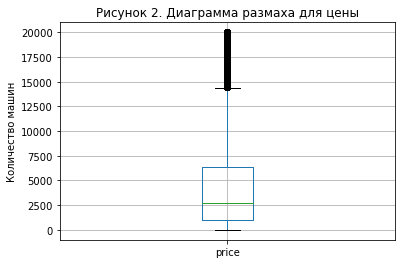

In [21]:
df.boxplot('price')
plt.ylabel('Количество машин')
plt.title('Рисунок 2. Диаграмма размаха для цены')

Как видно из рисунка 1 довольно большое количество объектов имеет нулевую цену. выведем количество машин с нулевой ценой

In [22]:
df_zero_price_index=df[df['price']==0].index
df=df.drop(df_zero_price_index)

Так как нулевых данных многовато в распределении, то лучше их удалить, потому что предсказывать для машин 0 цену врятли кому-то нужно

<div class="alert alert-block alert-info">
<b>Совет:</b> Самое интересное, что на нескольких сайтов по продажам подержанных автомобилей в Германии (страну можно определить по почтовым индексам, большинство из них из Германии) показало, что цены начинаются действительно с 0 и 1 евро, но это единичные объявления и не понятно, то ли это ошибка при заполнении формы, то ли машины на металлолом. Поэтому я тоже все-таки склоняюсь к тому, чтобы избавиться от таких данных
</div> 

<div class="alert alert-block alert-success">
<b>Комментарий студента:</b> К сожалению я пока не владею парсингом, так как полный новичек в программировании,  
    но буду осваивать. Спасибо за совет!
</div>

In [23]:
df['price'].isin([0]).sum()

In [24]:
df['price'].describe()

Изучим признак 'registration_year'

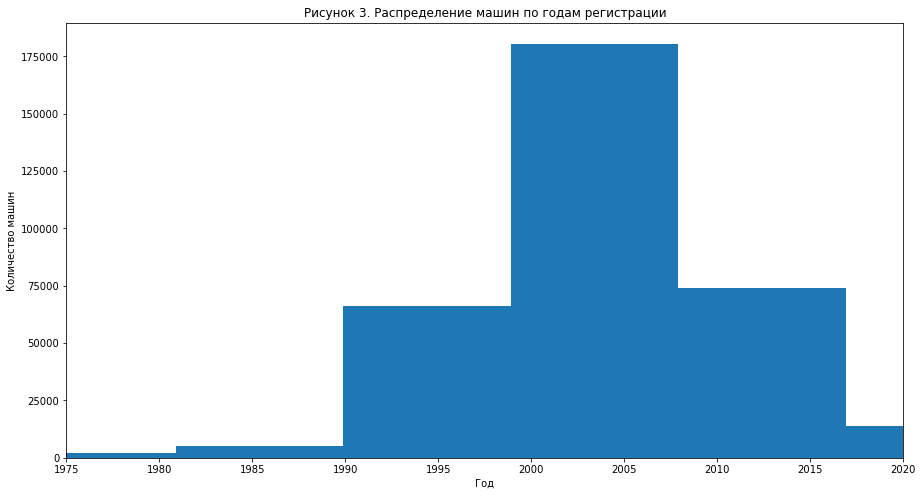

In [25]:
df['registration_year'].plot(title='Рисунок 3. Распределение машин по годам регистрации', kind='hist', bins=1000, figsize=(15,8))
plt.xlim(1975, 2020)
plt.ylabel("Количество машин")
plt.xlabel("Год")

Выведем распределение признака

In [26]:
df['registration_year'].describe()

Видно, что существуют записи с годами регистрации 1000 и 9999, очевидно, что это какая-то ошибка. Выведем количество строк,
с неразумным годом регистрации авто. Для этого ограничимся нижни разумным пределом 1960 г и верхним 2020 г ориентируясь на 
график 3.

In [27]:
df_registration_year_anomal_down=df.query('registration_year<1960')
df_registration_year_anomal_up=df.query('registration_year>2020')
display(df_registration_year_anomal_down)
display(df_registration_year_anomal_up)

Как видно из таблиц количество таких данных не очень большое, поэтому просто удалим эти наблюдения

In [28]:
df=df.drop(df_registration_year_anomal_down.index).reset_index()
df=df.drop(df_registration_year_anomal_up.index).reset_index()

In [29]:
df['registration_year'].describe()
df.info()

<div class="alert alert-block alert-success">
<b>Успех:</b> Есть
</div>

Изучим признак 'power'

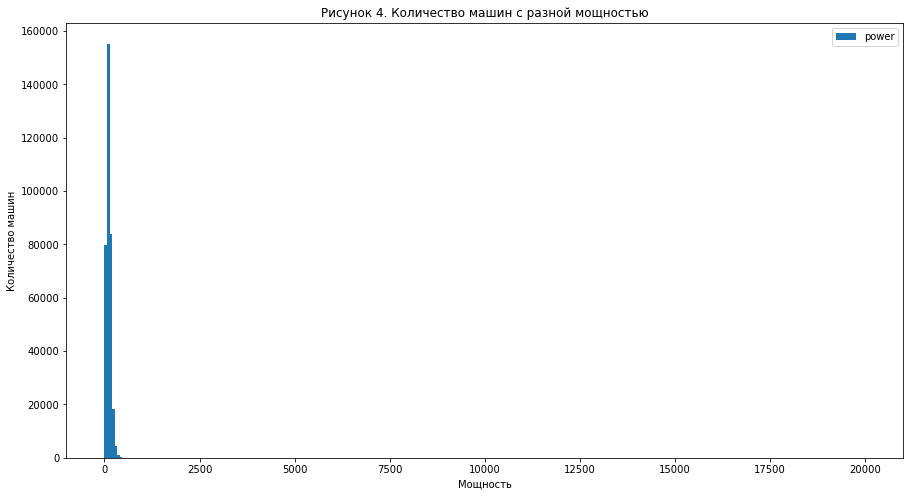

In [30]:
df.plot(y='power', title='Рисунок 4. Количество машин с разной мощностью', kind='hist', bins=300, figsize=(15,8))
plt.ylabel("Количество машин")
plt.xlabel("Мощность")

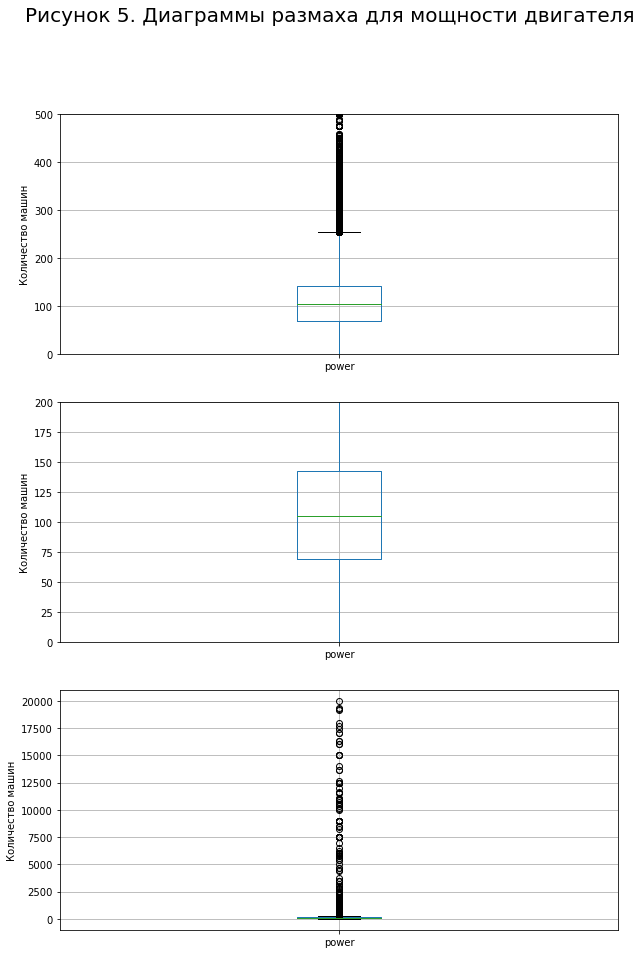

In [31]:
text_size_axis=10
text_size_title=25
fig = plt.figure(figsize=(10,15))

fig.suptitle('Рисунок 5. Диаграммы размаха для мощности двигателя', fontsize = 20) 

ax_1 = fig.add_subplot(3, 1, 1)

df.boxplot('power')
plt.ylim(0, 500)
plt.ylabel('Количество машин', fontsize = text_size_axis)

ax_2 = fig.add_subplot(3, 1, 2)

plt.ylabel('Количество машин', fontsize = text_size_axis)

df.boxplot('power')

plt.ylim(0, 200)

ax_3 = fig.add_subplot(3, 1, 3)
df.boxplot('power')

plt.ylabel('Количество машин', fontsize = text_size_axis)

plt.show()

In [32]:
df['power'].describe()

Как видно из диаграмм все наблюдения с мощностью двигателя более 250 можно считать выбросами. Рассчитаем количество данных,  
которое мы потеряем при удалении этих данных. 

In [33]:
print('Количество потерянных данных при удалении наблюдений с мощностью двигателя более 250, %:',  
      len(df.query('power>250'))/len(df)*100)

Как видно из расчета выше количество потерянных данных чуть больше 2%, поэтому можно удалить эти наблюдения.  
Также удалим наблюдения с мощностью 0

In [34]:
df_250=df.query('power>250').index
df=df.drop(df_250)

In [35]:
df_zero_price_index=df[df['power']==0].index
df=df.drop(df_zero_price_index).reset_index(drop=True)
print('Количество наблюдений с нулевой мощностью- ', df['power'].isin([0]).sum())

<div class="alert alert-block alert-success">
<b>Успех:</b> Пропуски и аномалии обработаны корректным образом, в целом хорошая предобработка.
</div>

# <a id='part6'>3.3 Подготовка данных к обучению модели</a>
<a href='#table of contents'>к оглавлению</a>

***Преобразуем категориальные признаки*** 

Закодируем колонки 'model' и 'brand' техникой Ordinal Encoding, так как в противном слуаем получается слишком много лишних признаков

In [36]:
column_encoder=['model', 'brand'] #получим названия столбцов

encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(df[column_encoder]), 
                                                      columns=df[column_encoder].columns)
display(data_ordinal)

Остальные признаки закодируем техникой OHE 

In [37]:
data_categorial=['vehicle_type', 'gearbox', 'fuel_type', 'not_repaired'] #получим названия столбцов

data_ohe = pd.get_dummies(df[data_categorial], drop_first=True)
display(data_ohe)

Получим общий датасет после преобразования

In [38]:
df_drop=df.drop(['vehicle_type', 'gearbox', 'fuel_type', 'not_repaired', 'model', 'brand'], axis=1)
display(df_drop)

In [39]:
df_sum=data_ordinal.join(data_ohe)

df_full=df_sum.join(df_drop) # получим общий датафрейм

display(df_full.columns) # выведем полученные столбцы

df_full.info()

Получим признаки и целевой признак

<div class="alert alert-block alert-success">
<b>Успех:</b> Использовать mix из OE and OHE - очень интересно, я думаю это наилучшее решение для данной ситуации. Ты избежал возможного переусложнения признакового пространства - 'проклятия размерности'
</div>

In [40]:
features=df_full.drop(['price', 'level_0', 'index'], axis=1) # получим признаки для обучения и удалим лишние столбцы с индексами
target=df_full['price']

Получим тренировочную и тестовую выборки

In [41]:
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.20, random_state=12345)

In [42]:
print(features_train.shape)
print(target_train.shape)

Масштабируем признаки

In [72]:
#получим названия столбцов

df_column= ['model', 'brand', 'vehicle_type_convertible', 'vehicle_type_coupe',
       'vehicle_type_other', 'vehicle_type_sedan', 'vehicle_type_small',
       'vehicle_type_suv', 'vehicle_type_unknown', 'vehicle_type_wagon',
       'gearbox_manual', 'gearbox_unknown', 'fuel_type_electric',
       'fuel_type_gasoline', 'fuel_type_hybrid', 'fuel_type_lpg',
       'fuel_type_other', 'fuel_type_petrol', 'fuel_type_unknown',
       'not_repaired_yes', 'registration_year',
       'power', 'kilometer', 'number_of_pictures'] 

scaler = StandardScaler()
scaler.fit(features_train[df_column])
features_train[df_column]= scaler.transform(features_train[df_column])
features_test[df_column]= scaler.transform(features_test[df_column])
display(features_train)
display(features_test)


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Отлично, что scaler был обучен только на трейне, но ты забыл масштабировать тестовую выюорку.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий студента:</b> Действительно ошибка  "по невнимательности". Исправил.
</div>

***ВОПРОС***: А почему не все значения лежат в интервали [-1,1]? Он же должен по идее все масштабировать, чтобы среднее значение было 0, а все остальные значения лежали в интервале от 0 до 1. Разве не так? И что означает предупреждение? 

<div class="alert alert-block alert-info">
<b>Ответ:</b> 

1) Двумя наиболее популярными методами масштабирования являются - стандартизация и нормализация. Нормализация - это то, о чем ты говоришь. Просто изменение масштаба данных из исходного диапазона таким образом, чтобы все значения находились в новом диапазоне от 0 до 1.<br> Пример инструмента - MinMaxScaler<br>
<br>
А стандартизация набора данных включает изменение масштаба распределения значений так, чтобы среднее наблюдаемых значений было равно 0, а стандартное отклонение - 1. Поэтому данные могут быть за пределами диапозона -1:1
<br> Пример инструмента - StandartScaler<br>
<br>

2) [Хорошая статься по поводу settingwithcopywarning](https://www.dataquest.io/blog/settingwithcopywarning/) <br>
Также у этого warning-a, бывают ложные срабатывания, его можно отключить, используя 

    pd.options.mode.chained_assignment = None
</div> 

<div class="alert alert-block alert-success">
<b>Комментарий студента:</b> Спасибо за статью и за сайт. Буду изучать.  
</div>

# <a id='part7'>4 ОБУЧЕНИЕ МОДЕЛЕЙ</a>
<a href='#table of contents'>к оглавлению</a>

# <a id='part8'>4.1 Обучим модель линейной регрессии</a>

***Без градиентного спуска и регуляризации***

In [44]:
r=12345

На тренировочных данных

In [45]:
startTime = time.time()

model = LinearRegression()
LinearRegression_predict=abs(cross_val_score(model, features_train, target_train, scoring='neg_mean_squared_error', cv=50)) 
LinearRegression_train_RMSE=(sum(LinearRegression_predict)/len(LinearRegression_predict))**0.5

endTime = time.time()
LinearRegression_totalTime_train = endTime - startTime

Выведем время обучения и метрику

In [46]:
print("Время, затраченное на выполнение данного кода, сек", LinearRegression_totalTime_train) 
print('Среднее RMSE на тренировочных данных', LinearRegression_train_RMSE)

На тестовых данных

In [47]:
startTime = time.time()

model = LinearRegression()
LinearRegression_predict=abs(cross_val_score(model, features_test, target_test, scoring='neg_mean_squared_error', cv=50)) 
LinearRegression_test_RMSE=(sum(LinearRegression_predict)/len(LinearRegression_predict))**0.5

endTime = time.time()
LinearRegression_totalTime_test = endTime - startTime

In [48]:
LinearRegression_test_time=2.65
LinearRegression_test_RMSE=3123
print("Время, затраченное на выполнение данного кода, сек", LinearRegression_totalTime_test) 
print('Среднее RMSE на тестовых данных', LinearRegression_test_RMSE)

***С градиентным спуском и регуляризацией***

Создадим класс для обучения модели линейной регрессии стохастическим градиентным спуском с регуляризацией.   

In [49]:
class SGDLinearRegression:
    def __init__(self, step_size, epochs, batch_size, reg_weight):
        self.step_size = step_size
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_weight = reg_weight
    
    def fit(self, train_features, train_target, **kwargs):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)        
        y = train_target
        w = np.zeros(X.shape[1])
        
        for _ in range(self.epochs):
            batches_count = X.shape[0] // self.batch_size
            for i in range(batches_count):
                begin = i * self.batch_size
                end = (i + 1) * self.batch_size
                X_batch = X[begin:end, :]
                y_batch = y[begin:end]
                gradient = 2 * X_batch.T.dot(X_batch.dot(w) - y_batch) / X_batch.shape[0]
                reg = 2 * w.copy()
                reg[0]=0
                gradient += self.reg_weight*reg
                w -= self.step_size * gradient
        self.w = w[1:]
        self.w0 = w[0]
    
    def get_params(self, deep = False):
        return {
        'step_size':self.step_size,
        'epochs':self.epochs,
        'batch_size':self.batch_size,
        'reg_weight':self.reg_weight
        }

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

<div class="alert alert-block alert-info">
<b>Ответ:</b> Кросс-валидация не работает потому что не хватает метода:
    
    def get_params(self, deep = False):
        return {
        'step_size':self.step_size,
        'epochs':self.epochs,
        'batch_size':self.batch_size,
        'reg_weight':self.reg_weight
    }
Но все равно могут вощникнуть проблемы, так как cross_val_score привык работать с моделями реализованными в sklearn.

<div class="alert alert-block alert-success">
<b>Комментарий студента:</b> Самостоятельно освоить инструмент мне не удалось, поэтому попросил наставника подробно объяснить.  Обещал на следующей консультации.
</div>

Обучение 

In [50]:
startTime = time.time()

model = SGDLinearRegression(0.01, 30, 200, 0.2)
model.fit(features_train, target_train)

endTime = time.time()
SGDLinearRegression_totalTime_train = endTime - startTime

Время обучения

In [51]:
print("Время, затраченное на обучение модели, сек", SGDLinearRegression_totalTime_train) 

Предсказание

In [53]:
startTime = time.time()

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)
SGDLinearRegression_MSE_train = mean_squared_error(target_train, pred_train).round(5)
SGDLinearRegression_MSE_test = mean_squared_error(target_test, pred_test).round(5)
SGDLinearRegression_RMSE_test=SGDLinearRegression_MSE_test**0.5
print("RMSE на тренировочных данных:", SGDLinearRegression_MSE_train**0.5)
print("RMSE на тестовых данных:", SGDLinearRegression_RMSE_test)

endTime = time.time()
SGDLinearRegression_time_test = endTime - startTime

Время предсказания

In [55]:
print("Время, затраченное на предсказание модели, сек", SGDLinearRegression_time_test)

<div class="alert alert-block alert-info">
<b>Ответ:</b> Все дело в том, что ты забыл масштабировать тестовую выборку, от этого и такие показатели метрик странные. Спасибо за обратную связь по поводу тренажера, я передам команде.
</div> 

<div class="alert alert-block alert-success">
<b>Комментарий студента:</b>  Сильно побить коробочную версию не удалось и я так понял это из-за отсутвия кросс-валидации, 
    поэтому буду осваивать sklearn. После масштабирования тестовой выборке все заработало.Ура!)
</div>

# <a id='part9'>4.2 Обучим модель деревьев</a>
<a href='#table of contents'>к оглавлению</a>

***Обучим модель случайного леса без градиентного спуска и регуляризации***

In [56]:
#создадим словарь с перебираемыми параметрами
parametrs = { 'n_estimators': range (10, 31, 10),
              'max_depth': range (1,6, 2),
              'min_samples_leaf': range (1,4)}

In [57]:
startTime = time.time()

model=RandomForestRegressor(random_state=r)
grid=GridSearchCV(model, parametrs, scoring='neg_mean_squared_error', cv=10)
model_fit=grid.fit(features_train, target_train)
best_score=grid.best_score_
print("Лучшее RMSE на тренировочных данных:", abs(best_score)**0.5)
print("Лучшие параметры:", grid.best_params_)
endTime = time.time()
RandomForestRegressor_time_fit = endTime - startTime

Время затраченное на обучение и подбор параметров

In [58]:
print("Время, затраченное на обучение и подбор параметров модели, сек", RandomForestRegressor_time_fit)

На тестовых данных

In [59]:
startTime = time.time()

model = RandomForestRegressor(random_state=r, max_depth=5, n_estimators=20, min_samples_leaf=1) 
RandomForestRegressor_predict=abs(cross_val_score(model, features_test, target_test, scoring='neg_mean_squared_error', cv=5))
RandomForestRegressor_predict_test_RMSE=(sum(RandomForestRegressor_predict)/len(RandomForestRegressor_predict))**0.5
endTime = time.time()
RandomForestRegressor_time_predict = endTime - startTime


Время затраченное на обучение и предсказание, а также метрика

In [60]:
print("Время, затраченное на обучение и предсказание модели, сек", RandomForestRegressor_time_predict)
print('Среднее RMSE на тестовых данных', RandomForestRegressor_predict_test_RMSE)

***Воспользуемся для обучения модели случайного леса библиотекой Cat Boost***

In [61]:
display(df)

In [62]:
#создадим датасет для обучения моделей градиентного бустинга

features_bust=df.drop(['price', 'level_0', 'index'], axis=1).reset_index() # получим признаки для обучения и удалим лишние столбцы с индексами
target_bust=df['price'].reset_index()

features_train_bust, features_test_bust, target_train_bust, target_test_bust = train_test_split(
features_bust, target_bust, test_size=0.25, random_state=12345)
features_train_bust=features_train_bust.drop(['index'], axis=1)
features_test_bust=features_test_bust.drop(['index'], axis=1)

In [63]:
display(features_train_bust)
display(features_test_bust)

Получим категориальные признаки 

In [64]:
print(features_train_bust.columns)
cat_features = ['vehicle_type', 'gearbox', 'model',
                'fuel_type', 'brand', 'not_repaired']

***Вопрос***  
Так и не понял в чем ошибка, но код оставляю. 

<div class="alert alert-block alert-info">
<b>Совет:</b> У тебя здесь просто небольшие опечатки, использовал не те выборки. Вот так корректнее будет
    
    %%time
    model = CatBoostRegressor(loss_function="RMSE", learning_rate=1, depth=5, iterations=100)
    model.fit(features_train_bust, target_train_bust, cat_features=cat_features, verbose=10)
    predict_train = model.predict(features_train_bust)
    predict_test = model.predict(features_test_bust)
    result_train = mean_squared_error(target_train_bust, predict_train)**0.5
    result_test = mean_squared_error(target_test_bust, predict_test)**0.5
    print('Лучшее RMSE на тренировочных данных', result_train)
    print('Лучшее RMSE на тестовых данных', result_test)
</div> 

<div class="alert alert-block alert-success">
<b>Комментарий студента:</b>  Спасибо. Я уже торможу что-то, совсем заучился) Но все равно не работает...    
    CatBoostError: c:/program files (x86)/go agent/pipelines/buildmaster/catboost.git/catboost/private/libs/target/data_providers.cpp:531: Currently only multi-regression objectives work with multidimensional target
</div>

<div class="alert alert-block alert-info">
<b>Ответ[2]:</b> У тебя в taget_train_bust колонка индекс мешается, вот и пишет что cat_boost не может работать с мульти-размерным таргетом.
</div>

Обучим модель

startTime = time.time()

model = CatBoostRegressor(loss_function="RMSE", learning_rate=1, depth=5, iterations=100)
model.fit(features_train_bust, target_train_bust, cat_features=cat_features, verbose=10)

endTime = time.time()
CatBoostRegressor_time_fit = endTime - startTime


print("Время, затраченное на обучение модели, сек", CatBoostRegressor_time_fit)

predict_train = model.predict(features_train_bust)
predict_test = model.predict(features_test_bust)
result_train = mean_squared_error(target_train_bust, predict_train)**0.5
result_test = mean_squared_error(target_test_bust, predict_test)**0.5
print('Лучшее RMSE на тренировочных данных', result_train)
print('Лучшее RMSE на тестовых данных', result_test)

***Воспользуемся для обучения модели случайного леса библиотекой LightGBM***

In [66]:
startTime = time.time()

model = LGBMRegressor(boosting_type='gbdt', n_estimators=300, max_depth=5)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=r)

n_scores_train = cross_val_score(model, features_train, target_train, scoring='neg_mean_squared_error',
                           cv=cv, n_jobs=-1, error_score='raise')

print('Лучшее RMSE на тренировочных данных', abs(n_scores_train).mean()**0.5)


endTime = time.time()
LGBMRegressor_time_fit= endTime - startTime
print("Время, затраченное на обучение модели, сек", LGBMRegressor_time_fit)

In [67]:
startTime = time.time()
n_scores_test = cross_val_score(model, features_test, target_test, scoring='neg_mean_squared_error',
                           cv=cv, n_jobs=-1, error_score='raise')
endTime = time.time()
LGBMRegressor_time_predict_test= endTime - startTime
RMSE_LGBMRegressor_test=abs(n_scores_test).mean()**0.5

print('Лучшее RMSE на тестовых данных', RMSE_LGBMRegressor_test)
print("Время, затраченное на предсказание модели, сек", LGBMRegressor_time_predict_test)

# <a id='part10'>5 Общий вывод</a>
<a href='#table of contents'>к оглавлению</a>

In [73]:
data = {'Модель,': ['Линейная регрессия без градиентного спуска и регуляризации', 'Линейная регрессия с градиентным спуском и регуляризацией',
                    'Градиентный бустинг LightGBM', 'Cлучайный лес без градиентного спуска и регуляризации'], 
        'RMSE на тестовой выборке, сек': [LinearRegression_test_RMSE, SGDLinearRegression_RMSE_test, RMSE_LGBMRegressor_test, RandomForestRegressor_predict_test_RMSE],
        'Время обучения, сек': [LinearRegression_totalTime_train, SGDLinearRegression_totalTime_train, LGBMRegressor_time_fit, RandomForestRegressor_time_fit], 
        'Время предсказания, сек': [LinearRegression_totalTime_test, SGDLinearRegression_totalTime_train, LGBMRegressor_time_predict_test, RandomForestRegressor_time_predict]}
table= pd.DataFrame.from_dict(data)
print('Таблица 1. Сравнение качества предсказания и времение обучения моделей')
display(table)

 - Как видно из таблицы 1 Лучшей моделью по качеству предсказания является модель градиентного бустинга, а худшей линейная регрессия. Регуляризация и обучение градиентным спуском особо не улучшили метрики для линейной регресии, но значительно увеличили время ее обучения и предсказания. 
 - Модель градиентного бустинга предсказывает лучше чем модель случайного леса, однако время предсказания дольше. Так как я не подбирал сильно параметры для модели градиентного бустинга время обучения у нее получилось быстрее чем у случайного леса, однако если параметры подбирать время обучения будет значительно дольше. 
 - Если заказчику важно качество лучшая модель - градиентный бустинг, если скорость - линейная регрессия, а если соотношение скорость обучения/предсказания и качество, то модель случайного леса. 

<div class="alert alert-block alert-success">

<b>Успех:</b>  Хорошая работа с моделями. Кросс-валидационные методы успешно применены при подборе гиперпараметров. Радует, что ты попробовал внутренний метод кодировки данных.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Заказчику интересно знать время обучения и скорость предсказания, поэтому эти показатели нужно посчитать и проанализировать отдельно друг от друга.
</div>

<div class="alert alert-block alert-success">

<b>Успех[2]:</b> Замечательно, так намного лучше.
</div>

<div class="alert alert-block alert-info">

<b>Совет:</b> Также можно было бы собрать все результаты в информативную таблицу для наглядности.
</div>